# Using Self Organizing Map

In [73]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [74]:
# Importing the dataset
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [75]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [86]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

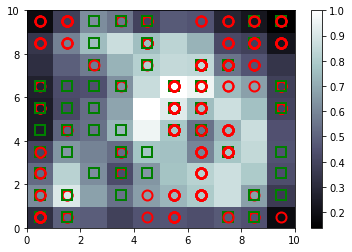

In [87]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [88]:
# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(9,9)], mappings[(8,7)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [89]:
#frauds

In [90]:
top_10_frauds = pd.DataFrame(frauds)

In [91]:
top_10_frauds[0] = top_10_frauds[0].astype(int)

In [92]:
top_10_frauds

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,15762799,1.0,30.67,2.500,2.0,13.0,8.0,2.250,0.0,0.0,0.0,1.0,1.0,340.0,1.0
1,15763194,1.0,22.67,0.165,2.0,8.0,3.0,2.250,0.0,0.0,0.0,1.0,1.0,0.0,1.0
2,15716347,1.0,35.17,4.500,2.0,14.0,8.0,5.750,0.0,0.0,0.0,1.0,1.0,711.0,1.0
3,15740411,1.0,40.58,3.290,2.0,7.0,4.0,3.500,0.0,0.0,0.0,1.0,1.0,400.0,1.0
4,15809909,1.0,30.58,2.710,1.0,7.0,4.0,0.125,0.0,0.0,0.0,1.0,1.0,80.0,1.0
5,15790689,1.0,21.17,0.000,2.0,8.0,4.0,0.500,0.0,0.0,0.0,1.0,1.0,0.0,1.0
6,15642934,1.0,43.17,5.000,2.0,3.0,5.0,2.250,0.0,0.0,0.0,1.0,2.0,141.0,1.0
7,15702149,1.0,32.75,2.335,2.0,2.0,8.0,5.750,0.0,0.0,0.0,1.0,2.0,292.0,1.0
8,15689786,1.0,52.42,1.500,2.0,2.0,4.0,3.750,0.0,0.0,0.0,1.0,2.0,0.0,351.0
9,15668889,1.0,34.42,1.335,2.0,3.0,5.0,0.125,0.0,0.0,0.0,1.0,2.0,440.0,4501.0


In [93]:
dataset[dataset['CustomerID']==15764444]

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
305,15764444,1,39.33,5.875,2,13,8,10.0,1,1,14,1,2,399,1,1
